# Model 9
This is one of many model files which were created in the hyperparameter optimisation process.

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import pandas as pd
pd.options.display.max_columns = 999

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Import models from scikit learn module
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.constraints import maxnorm

import numpy as np

/home/rhys/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 1. Data Preparation

In [2]:
# Read in the data
df_train = pd.read_csv('../../../0. Data/data_demand_cleaned_ML181026_train.csv', sep='\t')
df_train['period'] = pd.to_datetime(df_train['period'], format='%d/%m/%Y %H:%M')
df_train.sort_values(by='period', ascending=True, inplace=True)
df_train.tail()

,period,demand,air_temp,price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,lag_51,lag_334,lag_335,lag_336,lag_337,lag_338,lag_1006,lag_1007,lag_1008,lag_1009,lag_1010,lag_1679,lag_1680,lag_1681,lag_287,lag_288,lag_289,lag_672,lag_671,lag_673,dummy_Balckout,dummy_HeatWaves,dummy_Winter,dummy_Spring,dummy_Summer
14586,2017-02-28 21:30:00,2098.78,25.75,120.74,2209.24,2291.59,2388.93,2462.26,2587.28,2659.79,2657.41,1480.51,1540.91,1634.53,1700.59,1812.56,1913.76,1986.07,1246.51,1310.34,1363.35,1427.24,1483.31,1394.21,1472.73,1540.03,1612.38,1674.33,1325.21,1356.16,1402.59,1199.47,1231.24,1276.85,1505.27,1443.47,1565.76,0,0,0,0,1
14587,2017-02-28 22:00:00,1975.58,29.10,99.03,2098.78,2209.24,2291.59,2388.93,2462.26,2587.28,2659.79,1429.60,1480.51,1540.91,1634.53,1700.59,1812.56,1913.76,1192.87,1246.51,1310.34,1363.35,1427.24,1355.61,1394.21,1472.73,1540.03,1612.38,1256.31,1325.21,1356.16,1127.97,1199.47,1231.24,1443.47,1388.60,1505.27,0,0,0,0,1
14588,2017-02-28 22:30:00,1850.72,30.45,92.21,1975.58,2098.78,2209.24,2291.59,2388.93,2462.26,2587.28,1599.68,1429.60,1480.51,1540.91,1634.53,1700.59,1812.56,1175.69,1192.87,1246.51,1310.34,1363.35,1348.77,1355.61,1394.21,1472.73,1540.03,1230.60,1256.31,1325.21,1115.94,1127.97,1199.47,1388.60,1370.75,1443.47,0,0,0,0,1
14589,2017-02-28 23:00:00,1743.35,31.80,80.79,1850.72,1975.58,2098.78,2209.24,2291.59,2388.93,2462.26,1493.41,1599.68,1429.60,1480.51,1540.91,1634.53,1700.59,1344.08,1175.69,1192.87,1246.51,1310.34,1491.46,1348.77,1355.61,1394.21,1472.73,1244.27,1230.60,1256.31,1100.42,1115.94,1127.97,1370.75,1335.70,1388.60,0,0,0,0,1
14590,2017-02-28 23:30:00,1692.17,32.90,48.61,1743.35,1850.72,1975.58,2098.78,2209.24,2291.59,2388.93,1465.08,1493.41,1599.68,1429.60,1480.51,1540.91,1634.53,1261.73,1344.08,1175.69,1192.87,1246.51,1388.73,1491.46,1348.77,1355.61,1394.21,1418.21,1244.27,1230.60,1275.00,1100.42,1115.94,1335.70,1509.93,1370.75,0,0,0,0,1


In [3]:
# Read in the data
df_test = pd.read_csv('../../../0. Data/data_demand_cleaned_ML181026_test.csv', sep='\t')
df_test['period'] = pd.to_datetime(df_test['period'], format='%d/%m/%Y %H:%M')
df_test.sort_values(by='period', ascending=True, inplace=True)
df_test.head()

,period,demand,air_temp,price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,lag_51,lag_334,lag_335,lag_336,lag_337,lag_338,lag_1006,lag_1007,lag_1008,lag_1009,lag_1010,lag_1679,lag_1680,lag_1681,lag_287,lag_288,lag_289,lag_672,lag_671,lag_673,dummy_Balckout,dummy_HeatWaves,dummy_Winter,dummy_Spring,dummy_Summer
0,2017-03-01 00:00:00,1852.77,34.00,46.93,1692.17,1743.35,1850.72,1975.58,2098.78,2209.24,2291.59,1400.48,1465.08,1493.41,1599.68,1429.60,1480.51,1540.91,1205.58,1261.73,1344.08,1175.69,1192.87,1362.40,1388.73,1491.46,1348.77,1355.61,1311.26,1418.21,1244.27,1201.42,1275.00,1100.42,1509.93,1401.17,1335.70,0,0,0,0,0
1,2017-03-01 00:30:00,1698.09,33.80,70.58,1852.77,1692.17,1743.35,1850.72,1975.58,2098.78,2209.24,1356.33,1400.48,1465.08,1493.41,1599.68,1429.60,1480.51,1133.37,1205.58,1261.73,1344.08,1175.69,1294.11,1362.40,1388.73,1491.46,1348.77,1243.51,1311.26,1418.21,1142.83,1201.42,1275.00,1401.17,1339.87,1509.93,0,0,0,0,0
2,2017-03-01 01:00:00,1629.32,33.60,119.52,1698.09,1852.77,1692.17,1743.35,1850.72,1975.58,2098.78,1357.86,1356.33,1400.48,1465.08,1493.41,1599.68,1429.60,1090.07,1133.37,1205.58,1261.73,1344.08,1250.07,1294.11,1362.40,1388.73,1491.46,1186.26,1243.51,1311.26,1063.67,1142.83,1201.42,1339.87,1276.82,1401.17,0,0,0,0,0
3,2017-03-01 01:30:00,1546.72,32.25,105.58,1629.32,1698.09,1852.77,1692.17,1743.35,1850.72,1975.58,1345.53,1357.86,1356.33,1400.48,1465.08,1493.41,1599.68,1070.76,1090.07,1133.37,1205.58,1261.73,1216.36,1250.07,1294.11,1362.40,1388.73,1147.69,1186.26,1243.51,1004.65,1063.67,1142.83,1276.82,1231.36,1339.87,0,0,0,0,0
4,2017-03-01 02:00:00,1511.15,30.90,139.16,1546.72,1629.32,1698.09,1852.77,1692.17,1743.35,1850.72,1320.15,1345.53,1357.86,1356.33,1400.48,1465.08,1493.41,1060.36,1070.76,1090.07,1133.37,1205.58,1226.75,1216.36,1250.07,1294.11,1362.40,1137.57,1147.69,1186.26,1008.12,1004.65,1063.67,1231.36,1186.95,1276.82,0,0,0,0,0


We now have to remove the 1681 rows which contain NaN values. Otherwise, we will get errors when trying to create our models.

In [4]:
# Remove NaN values
df_train.dropna(axis=0, inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_test.dropna(axis=0, inplace=True)
df_test.reset_index(drop=True,inplace=True)

## 1.1 Train/Validation/Test Split

If we want a test set of approximately 20% then we need the last two months of data which are March 2017 and April 2017. This gives us a test set of approximately 18.5%. We do the same for the validation set which is January 2017 and February 2017. 

In [5]:
# # Create training and test sets
# split_point = 12910
# df_train_validate = df.iloc[0:split_point,:]
# df_test = df.iloc[split_point:,:]

In [6]:
# # Create training and validation sets
# split_point = 10078
# df_train = df_train_validate.iloc[0:split_point,:]
# df_validate = df_train_validate.iloc[split_point:,:]

In [7]:
# Shuffle 
from sklearn.utils import shuffle
df_train = shuffle(df_train)
#df_validate = shuffle(df_validate)
df_test = shuffle(df_test)

## 1.2 Convert Data

In [8]:
# Convert the data
X_train = df_train[["air_temp", "price", "lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "lag_6", "lag_7", "lag_45", "lag_46", "lag_47", "lag_48", "lag_49", "lag_50", "lag_51", "lag_334", "lag_335", "lag_336", "lag_337", "lag_338", "lag_1006", "lag_1007", "lag_1008", "lag_1009", "lag_1010", "lag_1679", "lag_1680", "lag_1681", "lag_287", "lag_288", "lag_289", "lag_672","lag_671", "lag_673", "dummy_Balckout", "dummy_HeatWaves", "dummy_Winter", "dummy_Spring", "dummy_Summer"]]
y_train = df_train[['demand']]

# Print the dimensions of X and y 
print("Dimensions of y: {}".format(y_train.shape))
print("Dimensions of X: {}".format(X_train.shape))

Dimensions of y: (12910, 1)
Dimensions of X: (12910, 40)


In [9]:
# # Convert the data
# X_validate = df_validate[["air_temp", "price", "lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "lag_6", "lag_7", "lag_45", "lag_46", "lag_47", "lag_48", "lag_49", "lag_50", "lag_51", "lag_334", "lag_335", "lag_336", "lag_337", "lag_338", "lag_1006", "lag_1007", "lag_1008", "lag_1009", "lag_1010", "lag_1679", "lag_1680", "lag_1681", "lag_287", "lag_288", "lag_289", "dummy_Balckout", "dummy_HeatWaves", "dummy_Winter", "dummy_Spring", "dummy_Summer"]]
# y_validate = df_validate[['demand']]

# # Print the dimensions of X and y 
# print("Dimensions of y: {}".format(y_validate.shape))
# print("Dimensions of X: {}".format(X_validate.shape))

In [10]:
# Convert the data
X_test = df_test[["air_temp", "price", "lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "lag_6", "lag_7", "lag_45", "lag_46", "lag_47", "lag_48", "lag_49", "lag_50", "lag_51", "lag_334", "lag_335", "lag_336", "lag_337", "lag_338", "lag_1006", "lag_1007", "lag_1008", "lag_1009", "lag_1010", "lag_1679", "lag_1680", "lag_1681", "lag_287", "lag_288", "lag_289", "lag_672","lag_671", "lag_673", "dummy_Balckout", "dummy_HeatWaves", "dummy_Winter", "dummy_Spring", "dummy_Summer"]]
y_test = df_test[['demand']]

# Print the dimensions of X and y 
print("Dimensions of y: {}".format(y_test.shape))
print("Dimensions of X: {}".format(X_test.shape))

Dimensions of y: (2909, 1)
Dimensions of X: (2909, 40)


## 1.3 Data Transformation
Making sure we only transform the numerical features and not the two dummy variables.

In [11]:
# We now create a list of numerical variables which will later be transformed
categorical = ['dummy_Balckout', 'dummy_HeatWaves', 'dummy_Winter', 'dummy_Spring', 'dummy_Summer']
exclude = categorical
numerical=[x for x in list(X_train.columns) if x not in exclude]

In [12]:
# Create numerical and categorical subsets of the data
X_train_numerical=X_train[numerical]
#X_validate_numerical=X_validate[numerical]
X_test_numerical=X_test[numerical]

X_train_categorical=X_train[categorical]
#X_validate_categorical=X_validate[categorical]
X_test_categorical=X_test[categorical]

In [13]:
# Use StandardScaler to transform numerical data
sc = StandardScaler().fit(X_train_numerical)
X_train_numerical_sc = sc.transform(X_train_numerical)
#X_validate_numerical_sc = sc.transform(X_validate_numerical)
X_test_numerical_sc = sc.transform(X_test_numerical)

# Add others here later

In [14]:
# Get the index from the previous numerical df
train_index = X_train_numerical.index
#validate_index = X_validate_numerical.index
test_index = X_test_numerical.index

# Create dataframe
X_train_numerical_sc = pd.DataFrame(X_train_numerical_sc, columns=numerical, index=train_index)
#X_validate_numerical_sc = pd.DataFrame(X_validate_numerical_sc, columns=numerical, index=validate_index)
X_test_numerical_sc = pd.DataFrame(X_test_numerical_sc, columns=numerical, index=test_index)

# Combine the data again to form the complete data set
X_train = pd.concat([X_train_numerical_sc, X_train_categorical], axis=1)
#X_validate = pd.concat([X_validate_numerical_sc, X_validate_categorical], axis=1)
X_test = pd.concat([X_test_numerical_sc, X_test_categorical], axis=1)

In [15]:
# Convert to arrays for modelling
X_train = X_train.values
#X_validate = X_validate.values
X_test = X_test.values

y_train = y_train.values
#y_validate = y_validate.values
y_test = y_test.values

# 2. Modelling

## 2.1 Functions for Scores

In [16]:
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def mae_cv_train(model):
    mae= -cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv = 5)
    return(mae)

def mae_cv_test(model):
    mae= -cross_val_score(model, X_test, y_test, scoring="neg_mean_absolute_error", cv = 5)
    return(mae)

## 2.2 Create Function That Constructs A Neural Network

https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/

https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/

In [17]:
# Find the size of the input
n_input = X_train.shape[1]

# Create function returning a compiled network
def create_network(optimizer='adam', layer1_units=15, layer2_units=15, layer3_units=15, init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=layer1_units, activation=activation, kernel_initializer=init_mode, kernel_constraint=maxnorm(weight_constraint), input_shape=(n_input,)))
    
    # Dropout
    network.add(Dropout(dropout_rate))
    
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=layer2_units, activation=activation, kernel_initializer=init_mode, kernel_constraint=maxnorm(weight_constraint)))
    
    # Dropout
    network.add(Dropout(dropout_rate))
    
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=layer3_units, activation=activation, kernel_initializer=init_mode, kernel_constraint=maxnorm(weight_constraint)))
    
    # Dropout
    network.add(Dropout(dropout_rate))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='linear', kernel_initializer=init_mode))

    # Compile neural network
    network.compile(loss='mean_squared_error', 
                    optimizer=optimizer, # Optimizer
                    metrics=['mean_absolute_error','mean_absolute_percentage_error']) # Accuracy performance metric
    
    # Return compiled network
    return network

## 2.3 Wrap Function In KerasClassifier

In [18]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasRegressor(build_fn=create_network, verbose=0)

## 2.4 Create Hyperparameter Search Space

In [19]:
# Create hyperparameter space
epochs = [500, 600, 700, 800, 900, 1200, 1600]
batches = [5, 10, 25, 50, 100, 200]
optimizers = ['Adam', 'Nadam']
init_mode = ['normal', 'glorot_normal', 'he_normal']
layer1_units = [10,15, 20, 25, 30, 35, 40, 50]
layer2_units = [5,10, 15, 20, 25, 30, 35, 40, 50]
layer3_units = [5,10, 15, 20, 25, 30, 35, 40, 50]
activation = ['relu']
weight_constraint = [1, 2, 3, 4]
dropout_rate = [0.2, 0.3, 0.4]

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init_mode=init_mode, layer1_units=layer1_units, layer2_units=layer2_units,layer3_units=layer3_units, activation=activation, dropout_rate=dropout_rate, weight_constraint=weight_constraint)

## 2.5 Conduct Grid Search

In [20]:
# Create grid search
#grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Randomised grid search
grid = RandomizedSearchCV(neural_network, hyperparameters, random_state=1, n_iter=50, cv=3, verbose=0, n_jobs=-1)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

## 2.6 Find Best Model’s Hyperparameters

In [21]:
# View hyperparameters of best neural network
grid_result.best_params_

{'activation': 'relu',
 'batch_size': 50,
 'dropout_rate': 0.2,
 'epochs': 1200,
 'init_mode': 'he_normal',
 'layer1_units': 25,
 'layer2_units': 35,
 'layer3_units': 35,
 'optimizer': 'Nadam',
 'weight_constraint': 3}

## 2.7 Display the Top 5 Models

In [22]:
df_cv_results = pd.DataFrame(grid_result.cv_results_)
df_cv_results.sort_values(by=['rank_test_score']).head(75)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activation,param_batch_size,param_dropout_rate,param_epochs,param_init_mode,param_layer1_units,param_layer2_units,param_layer3_units,param_optimizer,param_weight_constraint,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
19,497.574819,0.315340,-4918.947723,-4307.046231,relu,50,0.2,1200,he_normal,25,35,35,Nadam,3,"{'weight_constraint': 3, 'optimizer': 'Nadam',...",1,-4311.773688,-3937.879856,-4593.185816,-4455.909003,-5852.024770,-4527.349833,7.632334,0.038801,669.675384,262.664307
24,1754.907231,0.673140,-5496.967451,-5153.976842,relu,10,0.2,900,he_normal,25,40,30,Nadam,1,"{'weight_constraint': 1, 'optimizer': 'Nadam',...",2,-4533.691868,-4386.475371,-5389.252899,-5723.152695,-6568.181448,-5352.302461,89.210325,0.098260,834.077468,563.427816
11,1860.372790,0.512792,-5658.800130,-5071.734832,relu,10,0.2,1200,glorot_normal,40,30,30,Adam,2,"{'weight_constraint': 2, 'optimizer': 'Adam', ...",3,-8268.930459,-7985.350615,-4164.298420,-3713.570653,-4542.564926,-3516.283226,17.262674,0.023683,1852.303308,2061.811224
32,1013.562947,0.548923,-5881.771619,-5269.701728,relu,25,0.2,1200,he_normal,40,20,10,Nadam,4,"{'weight_constraint': 4, 'optimizer': 'Nadam',...",4,-5498.217775,-4777.547172,-7465.744191,-7738.269617,-4681.442027,-3293.288395,43.068165,0.042211,1168.559032,1847.724113
0,1820.685259,0.597642,-6122.004551,-5753.760191,relu,5,0.3,600,normal,35,30,15,Nadam,2,"{'weight_constraint': 2, 'optimizer': 'Nadam',...",5,-5700.866101,-5524.105625,-6511.303643,-6725.347344,-6153.941780,-5011.827605,2.224605,0.035927,331.635855,718.142692
15,139.278543,0.199307,-6162.180788,-6026.186793,relu,100,0.2,700,normal,40,50,10,Nadam,1,"{'weight_constraint': 1, 'optimizer': 'Nadam',...",6,-6284.331732,-6388.510773,-5555.477398,-6132.809102,-6646.704845,-5557.240505,1.964615,0.010353,453.772716,347.638512
17,280.247296,0.269867,-6167.870634,-5482.651054,relu,50,0.2,800,he_normal,50,20,25,Adam,3,"{'weight_constraint': 3, 'optimizer': 'Adam', ...",7,-6990.161893,-6573.979796,-6095.602285,-5961.080375,-5417.656628,-3912.892990,9.839427,0.012985,644.015381,1137.839095
33,2310.036912,0.750993,-6240.379632,-5921.934474,relu,10,0.2,1200,glorot_normal,30,40,15,Adam,2,"{'weight_constraint': 2, 'optimizer': 'Adam', ...",8,-5481.412366,-5785.189699,-5067.842239,-4837.983053,-8172.060671,-7142.630670,159.994574,0.154834,1376.221953,945.823983
30,82.530622,0.361368,-6485.362241,-6328.576590,relu,200,0.2,700,normal,20,20,20,Nadam,1,"{'weight_constraint': 1, 'optimizer': 'Nadam',...",9,-5962.162299,-6285.071114,-6570.493756,-7101.297330,-6923.552257,-5599.361327,3.267019,0.073841,397.082282,613.934027
43,2375.163651,1.488334,-6640.091946,-6168.516214,relu,5,0.3,500,glorot_normal,35,20,40,Nadam,2,"{'weight_constraint': 2, 'optimizer': 'Nadam',...",10,-5430.717284,-4851.978766,-6372.787838,-6663.845512,-8117.051769,-6989.724363,135.962949,0.234332,1112.879292,940.390839


# 3. Model Validation
I will take the 3 best models and fit them manually. Then I will run them on the validation data to get their scores. Repeat the stuff from below

## 3.1 Model 1

In [23]:
# Find the size of the input
n_input = X_train.shape[1]

# Define the model
model1 = Sequential()
model1.add(Dense(25, input_dim=n_input, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(35, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(35, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='linear', kernel_initializer='he_normal')) 

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_absolute_error','mean_absolute_percentage_error'])

# Fit the model
validation_data = (X_test, y_test)
history1 = model1.fit(X_train, y_train, epochs=1200, batch_size=50, validation_data=validation_data)

# Calculate the scores
scores1 = model1.evaluate(X_test, y_test)

Train on 12910 samples, validate on 2909 samples
Epoch 1/1200
12910/12910 [==============================] - 0s 39us/step - loss: 741673.3871 - mean_absolute_error: 725.0975 - mean_absolute_percentage_error: 56.3559 - val_loss: 230553.8550 - val_mean_absolute_error: 424.2269 - val_mean_absolute_percentage_error: 32.3591
Epoch 2/1200
12910/12910 [==============================] - 0s 18us/step - loss: 111898.3282 - mean_absolute_error: 262.0623 - mean_absolute_percentage_error: 21.8151 - val_loss: 260609.6505 - val_mean_absolute_error: 496.4691 - val_mean_absolute_percentage_error: 38.8850
Epoch 3/1200
12910/12910 [==============================] - 0s 19us/step - loss: 72569.1150 - mean_absolute_error: 210.3008 - mean_absolute_percentage_error: 17.0842 - val_loss: 308350.3085 - val_mean_absolute_error: 549.4295 - val_mean_absolute_percentage_error: 43.1092
Epoch 4/1200
12910/12910 [==============================] - 0s 17us/step - loss: 64663.7328 - mean_absolute_error: 197.6643 - mean_ab

Epoch 31/1200
12910/12910 [==============================] - 0s 18us/step - loss: 43765.7705 - mean_absolute_error: 161.1596 - mean_absolute_percentage_error: 13.3219 - val_loss: 46067.3387 - val_mean_absolute_error: 209.7049 - val_mean_absolute_percentage_error: 16.3332
Epoch 32/1200
12910/12910 [==============================] - 0s 18us/step - loss: 42427.2385 - mean_absolute_error: 158.8491 - mean_absolute_percentage_error: 13.0962 - val_loss: 47342.4224 - val_mean_absolute_error: 212.3616 - val_mean_absolute_percentage_error: 16.4468
Epoch 33/1200
12910/12910 [==============================] - 0s 19us/step - loss: 41387.2065 - mean_absolute_error: 155.9744 - mean_absolute_percentage_error: 13.0844 - val_loss: 53508.6640 - val_mean_absolute_error: 225.0816 - val_mean_absolute_percentage_error: 17.2593
Epoch 34/1200
12910/12910 [==============================] - 0s 18us/step - loss: 40869.8862 - mean_absolute_error: 155.8593 - mean_absolute_percentage_error: 13.0051 - val_loss: 44586

12910/12910 [==============================] - 0s 17us/step - loss: 33570.0650 - mean_absolute_error: 139.3175 - mean_absolute_percentage_error: 11.8216 - val_loss: 33580.4358 - val_mean_absolute_error: 172.5446 - val_mean_absolute_percentage_error: 13.7268
Epoch 92/1200
12910/12910 [==============================] - 0s 17us/step - loss: 33437.6741 - mean_absolute_error: 139.4694 - mean_absolute_percentage_error: 11.7535 - val_loss: 36126.9390 - val_mean_absolute_error: 182.3714 - val_mean_absolute_percentage_error: 14.2651
Epoch 93/1200
12910/12910 [==============================] - 0s 17us/step - loss: 33367.4350 - mean_absolute_error: 139.1966 - mean_absolute_percentage_error: 11.7429 - val_loss: 31425.3340 - val_mean_absolute_error: 170.6641 - val_mean_absolute_percentage_error: 13.2865
Epoch 94/1200
12910/12910 [==============================] - 0s 17us/step - loss: 33352.9309 - mean_absolute_error: 139.2340 - mean_absolute_percentage_error: 11.8587 - val_loss: 27411.3634 - val_me

12910/12910 [==============================] - 0s 18us/step - loss: 29783.1271 - mean_absolute_error: 130.8786 - mean_absolute_percentage_error: 11.2055 - val_loss: 18947.2674 - val_mean_absolute_error: 126.7182 - val_mean_absolute_percentage_error: 10.1949
Epoch 152/1200
12910/12910 [==============================] - 0s 17us/step - loss: 29505.5080 - mean_absolute_error: 129.9041 - mean_absolute_percentage_error: 11.0910 - val_loss: 17991.3196 - val_mean_absolute_error: 124.0192 - val_mean_absolute_percentage_error: 9.9272
Epoch 153/1200
12910/12910 [==============================] - 0s 18us/step - loss: 29495.3210 - mean_absolute_error: 130.2366 - mean_absolute_percentage_error: 11.2357 - val_loss: 21037.3297 - val_mean_absolute_error: 137.4433 - val_mean_absolute_percentage_error: 10.8458
Epoch 154/1200
12910/12910 [==============================] - 0s 18us/step - loss: 29357.4420 - mean_absolute_error: 129.7656 - mean_absolute_percentage_error: 11.1513 - val_loss: 24703.4279 - val_

12910/12910 [==============================] - 0s 18us/step - loss: 28057.9746 - mean_absolute_error: 126.5602 - mean_absolute_percentage_error: 10.8407 - val_loss: 21585.5514 - val_mean_absolute_error: 139.1014 - val_mean_absolute_percentage_error: 10.9423
Epoch 212/1200
12910/12910 [==============================] - 0s 18us/step - loss: 27168.7460 - mean_absolute_error: 125.1067 - mean_absolute_percentage_error: 10.7307 - val_loss: 29715.4295 - val_mean_absolute_error: 161.9324 - val_mean_absolute_percentage_error: 12.7169
Epoch 213/1200
12910/12910 [==============================] - 0s 18us/step - loss: 28101.5919 - mean_absolute_error: 126.3109 - mean_absolute_percentage_error: 10.7467 - val_loss: 26191.0903 - val_mean_absolute_error: 153.4310 - val_mean_absolute_percentage_error: 11.9751
Epoch 214/1200
12910/12910 [==============================] - 0s 18us/step - loss: 27219.8723 - mean_absolute_error: 124.9658 - mean_absolute_percentage_error: 10.7649 - val_loss: 24322.0695 - val

12910/12910 [==============================] - 0s 17us/step - loss: 25536.8438 - mean_absolute_error: 121.0390 - mean_absolute_percentage_error: 10.4908 - val_loss: 16616.9162 - val_mean_absolute_error: 117.0742 - val_mean_absolute_percentage_error: 9.5146
Epoch 272/1200
12910/12910 [==============================] - 0s 17us/step - loss: 27056.0049 - mean_absolute_error: 124.0445 - mean_absolute_percentage_error: 10.5608 - val_loss: 21193.6254 - val_mean_absolute_error: 134.3766 - val_mean_absolute_percentage_error: 10.7601
Epoch 273/1200
12910/12910 [==============================] - 0s 17us/step - loss: 26135.1307 - mean_absolute_error: 122.2214 - mean_absolute_percentage_error: 10.4247 - val_loss: 17088.5913 - val_mean_absolute_error: 117.3949 - val_mean_absolute_percentage_error: 9.6409
Epoch 274/1200
12910/12910 [==============================] - 0s 16us/step - loss: 26443.8663 - mean_absolute_error: 122.6453 - mean_absolute_percentage_error: 10.5314 - val_loss: 20152.4966 - val_m

12910/12910 [==============================] - 0s 17us/step - loss: 25186.0728 - mean_absolute_error: 120.2121 - mean_absolute_percentage_error: 10.2786 - val_loss: 14451.3544 - val_mean_absolute_error: 103.4588 - val_mean_absolute_percentage_error: 8.6220
Epoch 332/1200
12910/12910 [==============================] - 0s 17us/step - loss: 25081.8809 - mean_absolute_error: 119.8115 - mean_absolute_percentage_error: 10.1070 - val_loss: 18356.1916 - val_mean_absolute_error: 120.8997 - val_mean_absolute_percentage_error: 9.9364
Epoch 333/1200
12910/12910 [==============================] - 0s 17us/step - loss: 26015.6222 - mean_absolute_error: 122.1565 - mean_absolute_percentage_error: 10.5180 - val_loss: 15465.4204 - val_mean_absolute_error: 106.4641 - val_mean_absolute_percentage_error: 8.9300
Epoch 334/1200
12910/12910 [==============================] - 0s 17us/step - loss: 25709.6411 - mean_absolute_error: 121.5681 - mean_absolute_percentage_error: 10.4190 - val_loss: 20342.8323 - val_me

12910/12910 [==============================] - 0s 17us/step - loss: 25451.8882 - mean_absolute_error: 120.7105 - mean_absolute_percentage_error: 9.4215 - val_loss: 19602.1799 - val_mean_absolute_error: 118.7212 - val_mean_absolute_percentage_error: 9.8495
Epoch 392/1200
12910/12910 [==============================] - 0s 16us/step - loss: 25085.7436 - mean_absolute_error: 120.3225 - mean_absolute_percentage_error: 9.6256 - val_loss: 12549.3458 - val_mean_absolute_error: 98.9856 - val_mean_absolute_percentage_error: 8.0373
Epoch 393/1200
12910/12910 [==============================] - 0s 17us/step - loss: 24901.7619 - mean_absolute_error: 119.7106 - mean_absolute_percentage_error: 9.3838 - val_loss: 19869.0599 - val_mean_absolute_error: 128.5645 - val_mean_absolute_percentage_error: 10.3424
Epoch 394/1200
12910/12910 [==============================] - 0s 16us/step - loss: 24439.4800 - mean_absolute_error: 118.8483 - mean_absolute_percentage_error: 9.2550 - val_loss: 18888.0152 - val_mean_a

12910/12910 [==============================] - 0s 17us/step - loss: 23854.7591 - mean_absolute_error: 117.0862 - mean_absolute_percentage_error: 9.6848 - val_loss: 23041.1679 - val_mean_absolute_error: 141.6537 - val_mean_absolute_percentage_error: 11.2549
Epoch 452/1200
12910/12910 [==============================] - 0s 16us/step - loss: 23739.4917 - mean_absolute_error: 117.1599 - mean_absolute_percentage_error: 9.1931 - val_loss: 17150.1080 - val_mean_absolute_error: 116.3951 - val_mean_absolute_percentage_error: 9.5648
Epoch 453/1200
12910/12910 [==============================] - 0s 16us/step - loss: 23645.9796 - mean_absolute_error: 116.5271 - mean_absolute_percentage_error: 9.1762 - val_loss: 21043.8915 - val_mean_absolute_error: 135.5372 - val_mean_absolute_percentage_error: 10.8403
Epoch 454/1200
12910/12910 [==============================] - 0s 17us/step - loss: 23629.5938 - mean_absolute_error: 116.8216 - mean_absolute_percentage_error: 9.4228 - val_loss: 18774.8553 - val_mean

12910/12910 [==============================] - 0s 17us/step - loss: 23013.8162 - mean_absolute_error: 114.0506 - mean_absolute_percentage_error: 8.7302 - val_loss: 18946.6101 - val_mean_absolute_error: 127.9514 - val_mean_absolute_percentage_error: 10.0563
Epoch 512/1200
12910/12910 [==============================] - 0s 17us/step - loss: 23129.5090 - mean_absolute_error: 115.5826 - mean_absolute_percentage_error: 8.8971 - val_loss: 20406.7068 - val_mean_absolute_error: 130.2121 - val_mean_absolute_percentage_error: 10.5518
Epoch 513/1200
12910/12910 [==============================] - 0s 16us/step - loss: 22865.7672 - mean_absolute_error: 115.3319 - mean_absolute_percentage_error: 9.0486 - val_loss: 20902.1842 - val_mean_absolute_error: 133.0395 - val_mean_absolute_percentage_error: 10.5468
Epoch 514/1200
12910/12910 [==============================] - 0s 17us/step - loss: 22833.8935 - mean_absolute_error: 114.9506 - mean_absolute_percentage_error: 9.0328 - val_loss: 21002.1590 - val_mea

12910/12910 [==============================] - 0s 17us/step - loss: 22879.7860 - mean_absolute_error: 113.9265 - mean_absolute_percentage_error: 8.9343 - val_loss: 17340.0126 - val_mean_absolute_error: 119.9230 - val_mean_absolute_percentage_error: 9.7614
Epoch 572/1200
12910/12910 [==============================] - 0s 17us/step - loss: 22560.4456 - mean_absolute_error: 113.4411 - mean_absolute_percentage_error: 8.9057 - val_loss: 17865.6832 - val_mean_absolute_error: 123.9134 - val_mean_absolute_percentage_error: 9.8614
Epoch 573/1200
12910/12910 [==============================] - 0s 16us/step - loss: 22605.5534 - mean_absolute_error: 114.2001 - mean_absolute_percentage_error: 8.8386 - val_loss: 23766.3666 - val_mean_absolute_error: 143.8615 - val_mean_absolute_percentage_error: 11.1822
Epoch 574/1200
12910/12910 [==============================] - 0s 16us/step - loss: 22293.0204 - mean_absolute_error: 113.0928 - mean_absolute_percentage_error: 8.7375 - val_loss: 17052.2776 - val_mean_

12910/12910 [==============================] - 0s 16us/step - loss: 21815.2042 - mean_absolute_error: 111.6838 - mean_absolute_percentage_error: 8.5624 - val_loss: 18536.2450 - val_mean_absolute_error: 125.0092 - val_mean_absolute_percentage_error: 10.1712
Epoch 632/1200
12910/12910 [==============================] - 0s 17us/step - loss: 21943.0683 - mean_absolute_error: 112.9119 - mean_absolute_percentage_error: 8.7867 - val_loss: 16373.9518 - val_mean_absolute_error: 118.0153 - val_mean_absolute_percentage_error: 9.5138
Epoch 633/1200
12910/12910 [==============================] - 0s 17us/step - loss: 22132.8434 - mean_absolute_error: 113.4174 - mean_absolute_percentage_error: 8.7574 - val_loss: 23512.2419 - val_mean_absolute_error: 145.5630 - val_mean_absolute_percentage_error: 11.3614
Epoch 634/1200
12910/12910 [==============================] - 0s 16us/step - loss: 21599.7662 - mean_absolute_error: 111.3307 - mean_absolute_percentage_error: 8.7535 - val_loss: 18358.2464 - val_mean

12910/12910 [==============================] - 0s 17us/step - loss: 21473.1324 - mean_absolute_error: 110.7039 - mean_absolute_percentage_error: 8.4834 - val_loss: 15384.2252 - val_mean_absolute_error: 114.8934 - val_mean_absolute_percentage_error: 9.2370
Epoch 692/1200
12910/12910 [==============================] - 0s 16us/step - loss: 21400.8039 - mean_absolute_error: 110.6020 - mean_absolute_percentage_error: 8.7085 - val_loss: 16229.0137 - val_mean_absolute_error: 117.6577 - val_mean_absolute_percentage_error: 9.3817
Epoch 693/1200
12910/12910 [==============================] - 0s 17us/step - loss: 21336.6077 - mean_absolute_error: 110.7092 - mean_absolute_percentage_error: 8.4945 - val_loss: 21595.6843 - val_mean_absolute_error: 138.4950 - val_mean_absolute_percentage_error: 10.9964
Epoch 694/1200
12910/12910 [==============================] - 0s 17us/step - loss: 21051.6467 - mean_absolute_error: 109.8501 - mean_absolute_percentage_error: 8.4715 - val_loss: 17629.2369 - val_mean_

12910/12910 [==============================] - 0s 18us/step - loss: 20929.5409 - mean_absolute_error: 108.7589 - mean_absolute_percentage_error: 8.3703 - val_loss: 18380.9043 - val_mean_absolute_error: 126.3970 - val_mean_absolute_percentage_error: 10.0534
Epoch 752/1200
12910/12910 [==============================] - 0s 17us/step - loss: 20283.7724 - mean_absolute_error: 107.7063 - mean_absolute_percentage_error: 8.3451 - val_loss: 15475.6801 - val_mean_absolute_error: 115.2115 - val_mean_absolute_percentage_error: 9.2590
Epoch 753/1200
12910/12910 [==============================] - 0s 17us/step - loss: 21177.6329 - mean_absolute_error: 109.5465 - mean_absolute_percentage_error: 8.6152 - val_loss: 19867.5195 - val_mean_absolute_error: 132.8603 - val_mean_absolute_percentage_error: 10.5176
Epoch 754/1200
12910/12910 [==============================] - 0s 17us/step - loss: 20946.4894 - mean_absolute_error: 109.5633 - mean_absolute_percentage_error: 8.5364 - val_loss: 14465.3474 - val_mean

12910/12910 [==============================] - 0s 17us/step - loss: 20252.7001 - mean_absolute_error: 107.7669 - mean_absolute_percentage_error: 8.3012 - val_loss: 15711.1765 - val_mean_absolute_error: 118.3442 - val_mean_absolute_percentage_error: 9.1665
Epoch 812/1200
12910/12910 [==============================] - 0s 18us/step - loss: 20369.4852 - mean_absolute_error: 108.0498 - mean_absolute_percentage_error: 8.3689 - val_loss: 19517.7267 - val_mean_absolute_error: 132.1030 - val_mean_absolute_percentage_error: 10.2467
Epoch 813/1200
12910/12910 [==============================] - 0s 17us/step - loss: 20822.7481 - mean_absolute_error: 108.0634 - mean_absolute_percentage_error: 8.3116 - val_loss: 15373.4624 - val_mean_absolute_error: 116.7069 - val_mean_absolute_percentage_error: 9.0836
Epoch 814/1200
12910/12910 [==============================] - 0s 17us/step - loss: 20153.2258 - mean_absolute_error: 107.7562 - mean_absolute_percentage_error: 8.3589 - val_loss: 20216.2822 - val_mean_

12910/12910 [==============================] - 0s 18us/step - loss: 20090.3181 - mean_absolute_error: 107.0121 - mean_absolute_percentage_error: 8.3285 - val_loss: 16988.9084 - val_mean_absolute_error: 121.6519 - val_mean_absolute_percentage_error: 9.4601
Epoch 872/1200
12910/12910 [==============================] - 0s 18us/step - loss: 20342.4193 - mean_absolute_error: 107.0128 - mean_absolute_percentage_error: 8.3116 - val_loss: 21828.0332 - val_mean_absolute_error: 136.9543 - val_mean_absolute_percentage_error: 10.4279
Epoch 873/1200
12910/12910 [==============================] - 0s 18us/step - loss: 20052.5791 - mean_absolute_error: 106.7689 - mean_absolute_percentage_error: 8.4561 - val_loss: 18134.4470 - val_mean_absolute_error: 126.8998 - val_mean_absolute_percentage_error: 9.9093
Epoch 874/1200
12910/12910 [==============================] - 0s 17us/step - loss: 19711.7032 - mean_absolute_error: 105.8421 - mean_absolute_percentage_error: 8.2278 - val_loss: 15389.3627 - val_mean_

12910/12910 [==============================] - 0s 16us/step - loss: 19553.6235 - mean_absolute_error: 105.5709 - mean_absolute_percentage_error: 8.6050 - val_loss: 18329.0044 - val_mean_absolute_error: 127.6572 - val_mean_absolute_percentage_error: 9.8132
Epoch 932/1200
12910/12910 [==============================] - 0s 17us/step - loss: 19017.2700 - mean_absolute_error: 104.5301 - mean_absolute_percentage_error: 8.2255 - val_loss: 17499.3539 - val_mean_absolute_error: 125.3731 - val_mean_absolute_percentage_error: 9.7284
Epoch 933/1200
12910/12910 [==============================] - 0s 17us/step - loss: 19633.3314 - mean_absolute_error: 105.6853 - mean_absolute_percentage_error: 8.5328 - val_loss: 12901.5272 - val_mean_absolute_error: 105.7409 - val_mean_absolute_percentage_error: 8.2606
Epoch 934/1200
12910/12910 [==============================] - 0s 16us/step - loss: 19613.5130 - mean_absolute_error: 106.1316 - mean_absolute_percentage_error: 8.5441 - val_loss: 13513.6872 - val_mean_a

12910/12910 [==============================] - 0s 17us/step - loss: 18823.5006 - mean_absolute_error: 103.3963 - mean_absolute_percentage_error: 8.0358 - val_loss: 15767.1872 - val_mean_absolute_error: 116.7740 - val_mean_absolute_percentage_error: 8.9973
Epoch 992/1200
12910/12910 [==============================] - 0s 17us/step - loss: 19214.1241 - mean_absolute_error: 104.1700 - mean_absolute_percentage_error: 8.2009 - val_loss: 16425.9836 - val_mean_absolute_error: 119.4748 - val_mean_absolute_percentage_error: 9.2081
Epoch 993/1200
12910/12910 [==============================] - 0s 17us/step - loss: 19450.8822 - mean_absolute_error: 104.9409 - mean_absolute_percentage_error: 8.3407 - val_loss: 13583.1511 - val_mean_absolute_error: 108.2800 - val_mean_absolute_percentage_error: 8.3155
Epoch 994/1200
12910/12910 [==============================] - 0s 17us/step - loss: 19492.2188 - mean_absolute_error: 104.4127 - mean_absolute_percentage_error: 8.2377 - val_loss: 11272.7631 - val_mean_a

12910/12910 [==============================] - 0s 18us/step - loss: 18889.1284 - mean_absolute_error: 103.4235 - mean_absolute_percentage_error: 8.0096 - val_loss: 12997.2126 - val_mean_absolute_error: 104.8534 - val_mean_absolute_percentage_error: 8.0220
Epoch 1052/1200
12910/12910 [==============================] - 0s 18us/step - loss: 18607.9043 - mean_absolute_error: 102.5100 - mean_absolute_percentage_error: 7.8515 - val_loss: 15761.3147 - val_mean_absolute_error: 117.1928 - val_mean_absolute_percentage_error: 8.9697
Epoch 1053/1200
12910/12910 [==============================] - 0s 18us/step - loss: 18778.3515 - mean_absolute_error: 102.7091 - mean_absolute_percentage_error: 8.0076 - val_loss: 16573.3803 - val_mean_absolute_error: 119.3478 - val_mean_absolute_percentage_error: 9.1510
Epoch 1054/1200
12910/12910 [==============================] - 0s 18us/step - loss: 19094.0207 - mean_absolute_error: 103.4229 - mean_absolute_percentage_error: 7.9988 - val_loss: 11377.8750 - val_mea

12910/12910 [==============================] - 0s 17us/step - loss: 17642.0006 - mean_absolute_error: 100.4004 - mean_absolute_percentage_error: 7.9307 - val_loss: 13560.8730 - val_mean_absolute_error: 107.0478 - val_mean_absolute_percentage_error: 8.1290
Epoch 1112/1200
12910/12910 [==============================] - 0s 18us/step - loss: 18385.5356 - mean_absolute_error: 102.0373 - mean_absolute_percentage_error: 7.9277 - val_loss: 12947.6511 - val_mean_absolute_error: 104.6720 - val_mean_absolute_percentage_error: 8.0439
Epoch 1113/1200
12910/12910 [==============================] - 0s 18us/step - loss: 17949.1960 - mean_absolute_error: 100.7529 - mean_absolute_percentage_error: 8.0316 - val_loss: 11038.8039 - val_mean_absolute_error: 96.0076 - val_mean_absolute_percentage_error: 7.4989
Epoch 1114/1200
12910/12910 [==============================] - 0s 17us/step - loss: 18374.1040 - mean_absolute_error: 101.9587 - mean_absolute_percentage_error: 8.0925 - val_loss: 10177.4026 - val_mean

12910/12910 [==============================] - 0s 17us/step - loss: 17520.7718 - mean_absolute_error: 99.3851 - mean_absolute_percentage_error: 7.6456 - val_loss: 12440.0497 - val_mean_absolute_error: 102.0514 - val_mean_absolute_percentage_error: 7.8827
Epoch 1172/1200
12910/12910 [==============================] - 0s 17us/step - loss: 17890.5745 - mean_absolute_error: 100.4661 - mean_absolute_percentage_error: 7.8862 - val_loss: 13922.4444 - val_mean_absolute_error: 107.4893 - val_mean_absolute_percentage_error: 8.1142
Epoch 1173/1200
12910/12910 [==============================] - 0s 18us/step - loss: 18115.5898 - mean_absolute_error: 100.8680 - mean_absolute_percentage_error: 7.6434 - val_loss: 14691.7615 - val_mean_absolute_error: 110.1928 - val_mean_absolute_percentage_error: 8.3177
Epoch 1174/1200
12910/12910 [==============================] - 0s 18us/step - loss: 17775.4337 - mean_absolute_error: 100.8327 - mean_absolute_percentage_error: 8.0432 - val_loss: 14612.1915 - val_mean

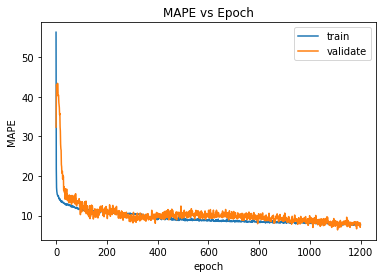

In [24]:
# summarize history for loss
plt.plot(history1.history['mean_absolute_percentage_error'])
plt.plot(history1.history['val_mean_absolute_percentage_error'])
#plt.ylim(0, 10)
plt.title('MAPE vs Epoch')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [25]:
print("\n%s: %.2f%%" % (model1.metrics_names[2], scores1[2]))


mean_absolute_percentage_error: 7.79%


In [26]:
print("\n%s: %.2f(MW)" % (model1.metrics_names[1], scores1[1])) 


mean_absolute_error: 102.33(MW)


## 3.2 Model 2

In [ ]:
# Find the size of the input
n_input = X_train.shape[1]

# Define the model
model2 = Sequential()
model2.add(Dense(25, input_dim=n_input, activation='relu', kernel_initializer='he_normal'))
model2.add(Dropout(0))
model2.add(Dense(25, activation='relu', kernel_initializer='he_normal'))
model2.add(Dropout(0))
model2.add(Dense(1, activation='linear', kernel_initializer='he_normal')) 

# Compile the model
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error','mean_absolute_percentage_error'])

# Fit the model
validation_data = (X_validate, y_validate)
history2 = model2.fit(X_train, y_train, epochs=700, batch_size=5, validation_data=validation_data)

# Calculate the scores
scores2 = model2.evaluate(X_validate, y_validate)

In [ ]:
# summarize history for loss
plt.plot(history2.history['mean_absolute_percentage_error'])
plt.plot(history2.history['val_mean_absolute_percentage_error'])
#plt.ylim(0, 10)
plt.title('MAPE vs Epoch')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [ ]:
print("\n%s: %.2f%%" % (model2.metrics_names[2], scores2[2]))
print("\n%s: %.2f(MW)" % (model2.metrics_names[1], scores2[1])) 

## 3.3. Model 3

In [ ]:
# Find the size of the input
n_input = X_train.shape[1]

# Define the model
model3 = Sequential()
model3.add(Dense(30, input_dim=n_input, activation='relu', kernel_initializer='glorot_normal'))
model3.add(Dropout(0))
model3.add(Dense(35, activation='relu', kernel_initializer='glorot_normal'))
model3.add(Dropout(0))
model3.add(Dense(1, activation='linear', kernel_initializer='glorot_normal')) 

# Compile the model
model3.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_absolute_error','mean_absolute_percentage_error'])

# Fit the model
validation_data = (X_validate, y_validate)
history3 = model3.fit(X_train, y_train, epochs=300, batch_size=25, validation_data=validation_data)

# Calculate the scores
scores3 = model3.evaluate(X_validate, y_validate)

In [ ]:
# summarize history for loss
plt.plot(history3.history['mean_absolute_percentage_error'])
plt.plot(history3.history['val_mean_absolute_percentage_error'])
#plt.ylim(0, 10)
plt.title('MAPE vs Epoch')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()

In [ ]:
print("\n%s: %.2f%%" % (model3.metrics_names[2], scores3[2]))
print("\n%s: %.2f(MW)" % (model3.metrics_names[1], scores3[1])) 